# 参考资料
## 2023.5.26
* **官方API说明文档**
  * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
* **matplotlib说明文档** 
  * 参考的绘图格式，非常丰富详细，可以自定义各种图表样式
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
* https://www.bilibili.com/video/BV1eR4y1B7fn

# 1 预处理
* 格式参考test.xlsx
* 需要有原始分数三列、标签矩阵三列、类别矩阵一列

In [124]:
import numpy as np
import pandas as pd          

# 5.17模型-5.5内部测试集-新计算方法结果-内部测试集.xlsx
excel_file = 'test.xlsx'     
df = pd.read_excel(excel_file)

* P概率值矩阵 m行3列 来源于原始分数三列

In [125]:
df.drop(df.index[[0]])  # 删除第一行
P = df.iloc[:,[1,2,3]]  #第1到第3列
P = np.array(P)
print(P.shape)
P

(747, 3)


array([[0.99981 , 0.      , 0.      ],
       [0.998173, 0.      , 0.      ],
       [0.958862, 0.457265, 0.      ],
       ...,
       [0.      , 0.      , 0.987441],
       [0.      , 0.929509, 0.      ],
       [0.      , 0.      , 0.99889 ]])

* L矩阵 m行3列 来源于标签矩阵三列

In [126]:
L = df.iloc[:,[5,6,7]]
L = np.array(L)
print(L.shape)
L

(747, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

* label矩阵 m行1列 来源于类别矩阵一列

In [127]:
# label矩阵
label = df.iloc[:,[8]]
label = np.array(label)
label = label.ravel()
print(label.shape)
label

(747,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 2 绘制每一个类别的ROC曲线

In [128]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import matplotlib;matplotlib.rc("font",family='Microsoft YaHei')

## 2.1 分别画单个类别的ROC曲线
* **以0-1分为例**
* label_class0 标签值，是一维数组，如果实际图片为0-1分，该值为1，否则为-1
* score 概率值，是一维数组，为对应图片0-1分的预测分数

In [129]:
label_class0 = []
score = []
for i in label:
    if i == 0:
        label_class0.append(1)
    else:
        label_class0.append(-1)
score = [P[i,0] for i in range(P.shape[0])]

In [130]:
print(label_class0)
print(score)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

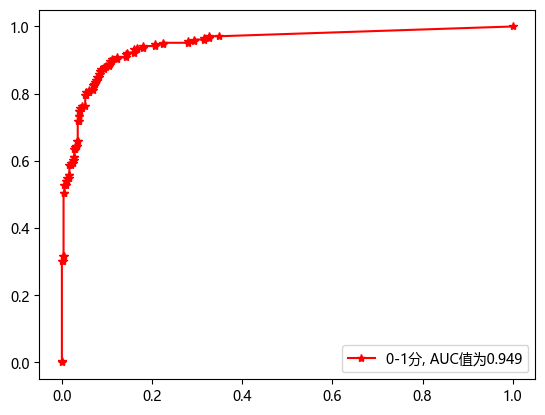

In [133]:
fpr, tpr, threshold = roc_curve(label_class0, score)
auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '*-', color='red', label='0-1分, AUC值为'+str('%.3f'%auc_result))  
plt.legend(); plt.show()

## 2.2 单个类别的ROC曲线画在同一张图
* 参考2.1 在外面加个循环即可

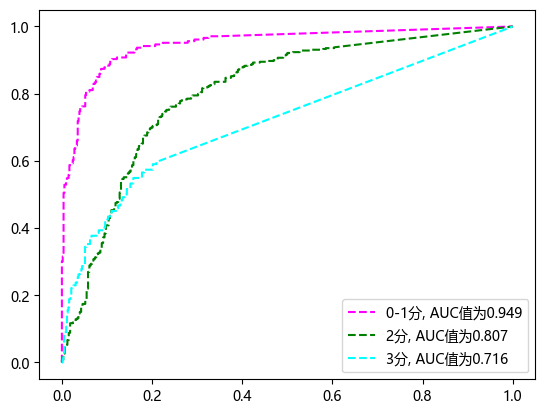

In [143]:
colors = ['magenta','green','cyan'] # 设置三条ROC曲线的颜色
num_classes = ['0-1分','2分','3分']
for j in range(len(num_classes)): # 循环三次
    label_class = []
    score = []
    for i in label:
        if i == j:
            label_class.append(1)
        else:
            label_class.append(-1)
    score = [P[i,j] for i in range(P.shape[0])]
    fpr, tpr, threshold = roc_curve(label_class, score)
    auc_result = auc(fpr, tpr)
    plt.plot(fpr, tpr, '--', color=colors[j], label=num_classes[j] + ', AUC值为' + str('%.3f'%auc_result)) 
plt.legend(); plt.show()

# 3 微平均法绘制总体ROC曲线
* 需要用到第1步预处理中的L矩阵，这个矩阵的特点m行3列，全由0或1组成

In [137]:
print(L.shape)
L

(747, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

In [138]:
P

array([[0.99981 , 0.      , 0.      ],
       [0.998173, 0.      , 0.      ],
       [0.958862, 0.457265, 0.      ],
       ...,
       [0.      , 0.      , 0.987441],
       [0.      , 0.929509, 0.      ],
       [0.      , 0.      , 0.99889 ]])

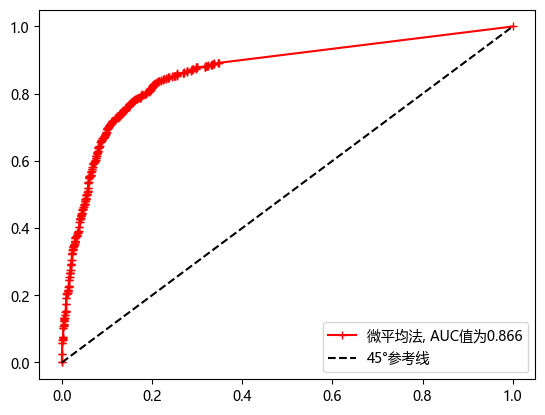

In [148]:
for i in range(P.shape[0]):
    fpr, tpr, threshold = roc_curve(L.ravel(),P.ravel())
    auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '+-', color='red', label='微平均法, AUC值为' + str('%.3f'%auc_result)) 
plt.plot([0,1],[0,1],'--', color='black', label='45°参考线')
plt.legend();plt.show()

# 4 把所有ROC画在一起

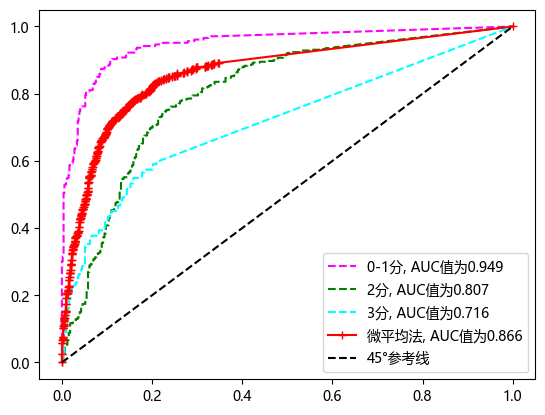

In [149]:
colors = ['magenta','green','cyan'] # 设置三条ROC曲线的颜色
num_classes = ['0-1分','2分','3分']
for j in range(len(num_classes)): # 循环三次
    label_class = []
    score = []
    for i in label:
        if i == j:
            label_class.append(1)
        else:
            label_class.append(-1)
    score = [P[i,j] for i in range(P.shape[0])]
    fpr, tpr, threshold = roc_curve(label_class, score)
    auc_result = auc(fpr, tpr)
    plt.plot(fpr, tpr, '--', color=colors[j], label=num_classes[j] + ', AUC值为' + str('%.3f'%auc_result)) 
plt.legend();

for i in range(P.shape[0]):
    fpr, tpr, threshold = roc_curve(L.ravel(),P.ravel())
    auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '+-', color='red', label='微平均法, AUC值为' + str('%.3f'%auc_result)) 
plt.plot([0,1],[0,1],'--', color='black', label='45°参考线')
plt.legend();plt.show()